In [16]:
from pylab import *
import numpy as np
import matplotlib, pylab
from dcll.npamlib import plotLIF
from dcll.pytorch_libdcll import *
from dcll.load_dvsgestures_sparse import *

matplotlib.rcParams['text.usetex']=False
matplotlib.rcParams['savefig.dpi']=400.
matplotlib.rcParams['font.size']=14.0
matplotlib.rcParams['figure.figsize']=(5.0,3.5)
matplotlib.rcParams['axes.formatter.limits']=[-10,10]
matplotlib.rcParams['axes.labelsize']= 14.
matplotlib.rcParams['figure.subplot.bottom'] = .2
matplotlib.rcParams['figure.subplot.left'] = .2       

In [17]:
def convergence_multiple(dirs, Nlayers=3):
    res  = np.empty([len(dirs), Nlayers])
    pl = [[] for _ in range(len(dirs))]
    for k, d in enumerate(dirs):
        directory = samples_dir+d
        args = np.load(directory+"args.pkl")
        testepochs = np.arange(0,args.epochs,args.testinterval, dtype='int')
        n_iter_test = 1800
        iter_test = np.arange(1,n_iter_test+20,20)
        Ntests = len(testepochs)
        acc_test = np.load(directory+"acc_test.npy")[:Ntests]

        N = 288

        bs = [args.batchsize for i in range(N//args.batchsize)] 
        if (N%args.batchsize)>0:
            bs.append(N%args.batchsize)

        weights = np.array(bs)/N
        weighted_acc = np.zeros([Ntests,Nlayers],dtype='float')
        for i in range(Nlayers):
            weighted_acc[:,i] = (acc_test[:,:,i]*weights).sum(axis=1)
            
        for l in range(Nlayers):
            x = testepochs*args.batchsize//1000
            y = 1-weighted_acc[:,l]
            xm = x.reshape(-1,5).mean(axis=1)
            ym = y.reshape(-1,5).mean(axis=1)
            res[k,l] = ym[-1]
            pl[k].append(ym)
    return res, np.array(xm), np.array(pl)


[0.72180556 0.11902778 0.05819444]


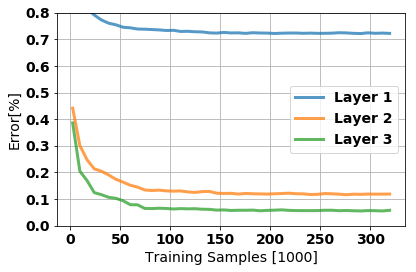

In [33]:
samples_dir = '../samples/'
dirs = [samples_dir+'Results_dvsgestures/020__18-11-2018/',
        samples_dir+'Results_dvsgestures/021__19-11-2018/',
        samples_dir+'Results_dvsgestures/023__19-11-2018/',
        samples_dir+'Results_dvsgestures/024__20-11-2018/',
        samples_dir+'Results_dvsgestures/025__20-11-2018/']
res, xm, ym = convergence_multiple(dirs)
print(res.mean(0))
fig = figure(figsize=(6,4))
ax = subplot(111)      
for l in range(3):
    ax.plot(xm, ym.mean(axis=0)[l,:], linewidth=3, alpha=.75, label = 'Layer {}'.format(l+1))

ax.set_yticks(np.arange(0,1.1,0.1))
ax.grid()
legend()
ax.set_ylabel('Error[%]')
ax.set_xlabel('Training Samples [1000]')
ax.set_ylim([0,.8])
tight_layout()
savefig(directory+'convergence_dvs_gestures_small.png', dpi=300, frameon=False)

In [19]:
ym.shape

(5, 3, 45)

In [20]:
samples_dir = '../samples/'
Nlayers = 3
#directory = "Results/105__08-10-2018/"
#directory = "Results/104__04-10-2018/"
#directory = samples_dir+"Results/101__02-10-2018/"
##Best:
#directory = samples_dir+"Results/156__05-11-2018/"
directory = samples_dir+"Results_dvsgestures/023__19-11-2018/"
args = np.load(directory+"args.pkl")
testepochs = np.arange(0,args.epochs,args.testinterval, dtype='int')
n_iter_test = 1800
iter_test = np.arange(1,n_iter_test+20,20)
Ntests = len(testepochs)
acc_test = np.load(directory+"acc_test.npy")[:Ntests]

N = 288

bs = [args.batchsize for i in range(N//args.batchsize)] 
if (N%args.batchsize)>0:
    bs.append(N%args.batchsize)

weights = np.array(bs)/N
weighted_acc = np.zeros([Ntests,Nlayers],dtype='float')
for i in range(Nlayers):
    weighted_acc[:,i] = (acc_test[:,:,i]*weights).sum(axis=1)

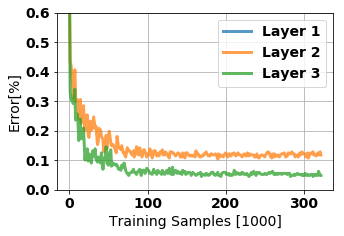

In [21]:
fig = figure()
ax = subplot(111)
for l in range(Nlayers):
    ax.plot(testepochs*args.batchsize//1000, 1-weighted_acc[:,l], linewidth=3, alpha=.75, label = 'Layer {}'.format(l+1))
ax.set_yticks(np.arange(0,1.1,0.1))
ax.grid()
legend()
ax.set_ylabel('Error[%]')
ax.set_xlabel('Training Samples [1000]')
ax.set_ylim([0,.6])
tight_layout()
savefig(directory+'convergence_dvs_gestures.png', dpi=300, frameon=False)


0.663888888888889
0.12083333333333335
0.05208333333333335


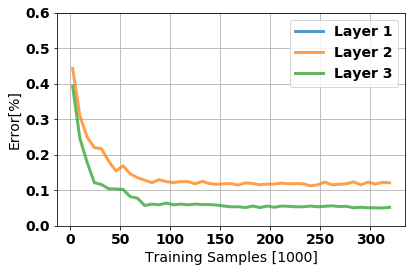

In [22]:
fig = figure(figsize=(6,4))
ax = subplot(111)
for l in range(Nlayers):
    x = testepochs*args.batchsize//1000
    y = 1-weighted_acc[:,l]
    xm = x.reshape(-1,5).mean(axis=1)
    ym = y.reshape(-1,5).mean(axis=1)
    ax.plot(xm, ym, linewidth=3, alpha=.75, label = 'Layer {}'.format(l+1))
    print(ym[-1])
ax.set_yticks(np.arange(0,1.1,0.1))
ax.grid()
legend()
ax.set_ylabel('Error[%]')
ax.set_xlabel('Training Samples [1000]')
ax.set_ylim([0,.6])
tight_layout()
savefig(directory+'convergence_dvs_gestures_small.png', dpi=300, frameon=False)


0.663888888888889
0.12083333333333335
0.05208333333333335
../samples/Results_dvsgestures/023__19-11-2018/convergence_dvs_gestures_small_largefonts.png


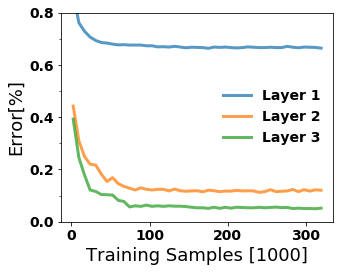

In [45]:
fig = figure(figsize=(5,4))
ax = subplot(111)
for l in range(Nlayers):
    x = testepochs*args.batchsize//1000
    y = 1-weighted_acc[:,l]
    xm = x.reshape(-1,5).mean(axis=1)
    ym = y.reshape(-1,5).mean(axis=1)
    ax.plot(xm, ym, linewidth=3, alpha=.75, label = 'Layer {}'.format(l+1))
    print(ym[-1])
ax.set_yticks(np.arange(0,1.1,0.1))
ax.grid()
legend(frameon=False)
ax.set_ylabel('Error[%]', fontsize=18)
ax.set_xlabel('Training Samples [1000]', fontsize=18)
ax.set_ylim([0,.8])
ax.set_yticks([0,.2,.4,.6,.8], minor=False)
ax.set_yticks([.1,.3,.5,.7], minor=True)
ax.xaxis.grid(False, which='major')
ax.yaxis.grid(False, which='major')
ax.yaxis.grid(False, which='minor')
tight_layout()

savefig(directory+'convergence_dvs_gestures_small_largefonts.png', dpi=500, frameon=False)
print(directory+'convergence_dvs_gestures_small_largefonts.png')


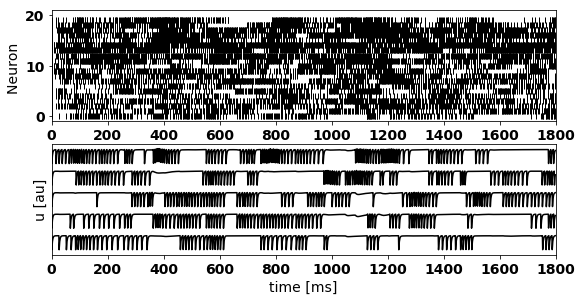

<Figure size 360x252 with 0 Axes>

In [24]:
voutput = np.load(directory+"doutput4.npy")
soutput = np.load(directory+"doutput1.npy")
soutput = soutput.reshape(soutput.shape[0],  -1)
voutput = voutput.reshape(voutput.shape[0],  -1)
fig = figure(figsize=[10,5])
ax1, ax2 = plotLIF(voutput[:,0:5],soutput[:,0:20],  staggering=1, color='k')
ax2.set_ylabel('Neuron')
ax2.set_xlabel('Time [ms]')

tight_layout()
fig.savefig(directory+'convergence_dvs_gestures_raster.png',dpi = 300)

In [25]:
voutput.shape

(1800, 57600)

In [26]:
from tqdm import tqdm
def accuracy_by_vote(pvoutput, labels):
    from collections import Counter
    pvoutput_ = np.array(pvoutput).T
    n = len(pvoutput_)
    arr = np.empty(n)
    arrl = np.empty(n)
    labels_ = labels.argmax(axis=2).T
    for i in range(n):
        arr[i] = Counter(pvoutput_[i]).most_common(1)[0][0]
        arrl[i] = Counter(labels_[i]).most_common(1)[0][0]
    return float(np.mean((arr == arrl)))

labels = np.load(directory + "testlabels.npy")
inputrate = np.load(directory + "testinputrate.npy")
accs = [[] for i in range(Nlayers)]
for l in range(Nlayers):    
    clout = np.load(directory + "clout{}.npy".format(l+1))
    for i in tqdm(iter_test):
        accs[l].append(accuracy_by_vote(clout[0:i],labels))
        

100%|██████████| 91/91 [00:09<00:00,  7.39it/s]


0.6701388888888888
0.11805555555555558
0.05902777777777779


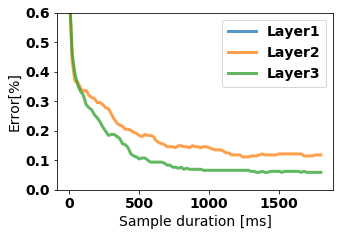

In [27]:
fig = figure()
#ax0 = subplot(211)
ax1 = subplot(111)
#ax0.plot(inputrate[1:], color='k', linewidth=3, alpha=.75)
for l in range(Nlayers):
    ax1.plot(iter_test,1-np.array(accs[l]), linewidth=3, alpha=.75, label = "Layer{}".format(l+1))
    print(1-accs[l][-1])
ax1.set_ylabel('Error[%]')
ax1.set_xlabel('Sample duration [ms]')
ax1.set_ylim([0,.6])
legend()
tight_layout()
savefig(directory+'convergence_dvs_gestures_sampleduration.png')

In [28]:
iter_test


array([   1,   21,   41,   61,   81,  101,  121,  141,  161,  181,  201,
        221,  241,  261,  281,  301,  321,  341,  361,  381,  401,  421,
        441,  461,  481,  501,  521,  541,  561,  581,  601,  621,  641,
        661,  681,  701,  721,  741,  761,  781,  801,  821,  841,  861,
        881,  901,  921,  941,  961,  981, 1001, 1021, 1041, 1061, 1081,
       1101, 1121, 1141, 1161, 1181, 1201, 1221, 1241, 1261, 1281, 1301,
       1321, 1341, 1361, 1381, 1401, 1421, 1441, 1461, 1481, 1501, 1521,
       1541, 1561, 1581, 1601, 1621, 1641, 1661, 1681, 1701, 1721, 1741,
       1761, 1781, 1801])

In [29]:
input_test = np.load(directory + "testinput.npy")

In [30]:
def plot_gestures_imshow(images, labels, nim=11, avg=50, do1h = True, transpose=False):
    from matplotlib import colors
    import numpy as np

    np.random.seed(101)
    zvals = np.random.rand(100, 100) * 10

    # make a color map of fixed colors
    cmap = colors.ListedColormap(['red','black', 'black','green'])
    bounds=[-1,-0.1,.1,1]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    import pylab as plt
    plt.figure(figsize = [20,16])
    import matplotlib.gridspec as gridspec
    if not transpose:
        gs = gridspec.GridSpec(images.shape[1]//avg, nim)
    else:
        gs = gridspec.GridSpec(nim, images.shape[1]//avg)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=0.95, wspace=.0, hspace=.04)
    if do1h:
        categories = labels.argmax(axis=1)
    else:
        categories = labels
    s=[]
    for j in range(nim):
         for i in range(images.shape[1]//avg):
             if not transpose:
                 ax = plt.subplot(gs[i, j])
             else:
                 ax = plt.subplot(gs[j, i])
             on_event = images[j,i*avg:(i*avg+avg),0,:,:].sum(axis=0).T
             off_event = -images[j,i*avg:(i*avg+avg),1,:,:].sum(axis=0).T
             plt.imshow(on_event+off_event, cmap=cmap, norm=norm, interpolation='nearest')
             plt.xticks([])
             if i==0: 
                plt.title(mapping[labels[0,j].argmax()], fontsize=20)
             plt.text(3,5,'t={}ms'.format(i*avg),color='white')
             plt.yticks([])
         s.append(images[j].sum())
    print(s)

[1813.0, 3574.0, 2690.0, 7347.0, 8620.0]


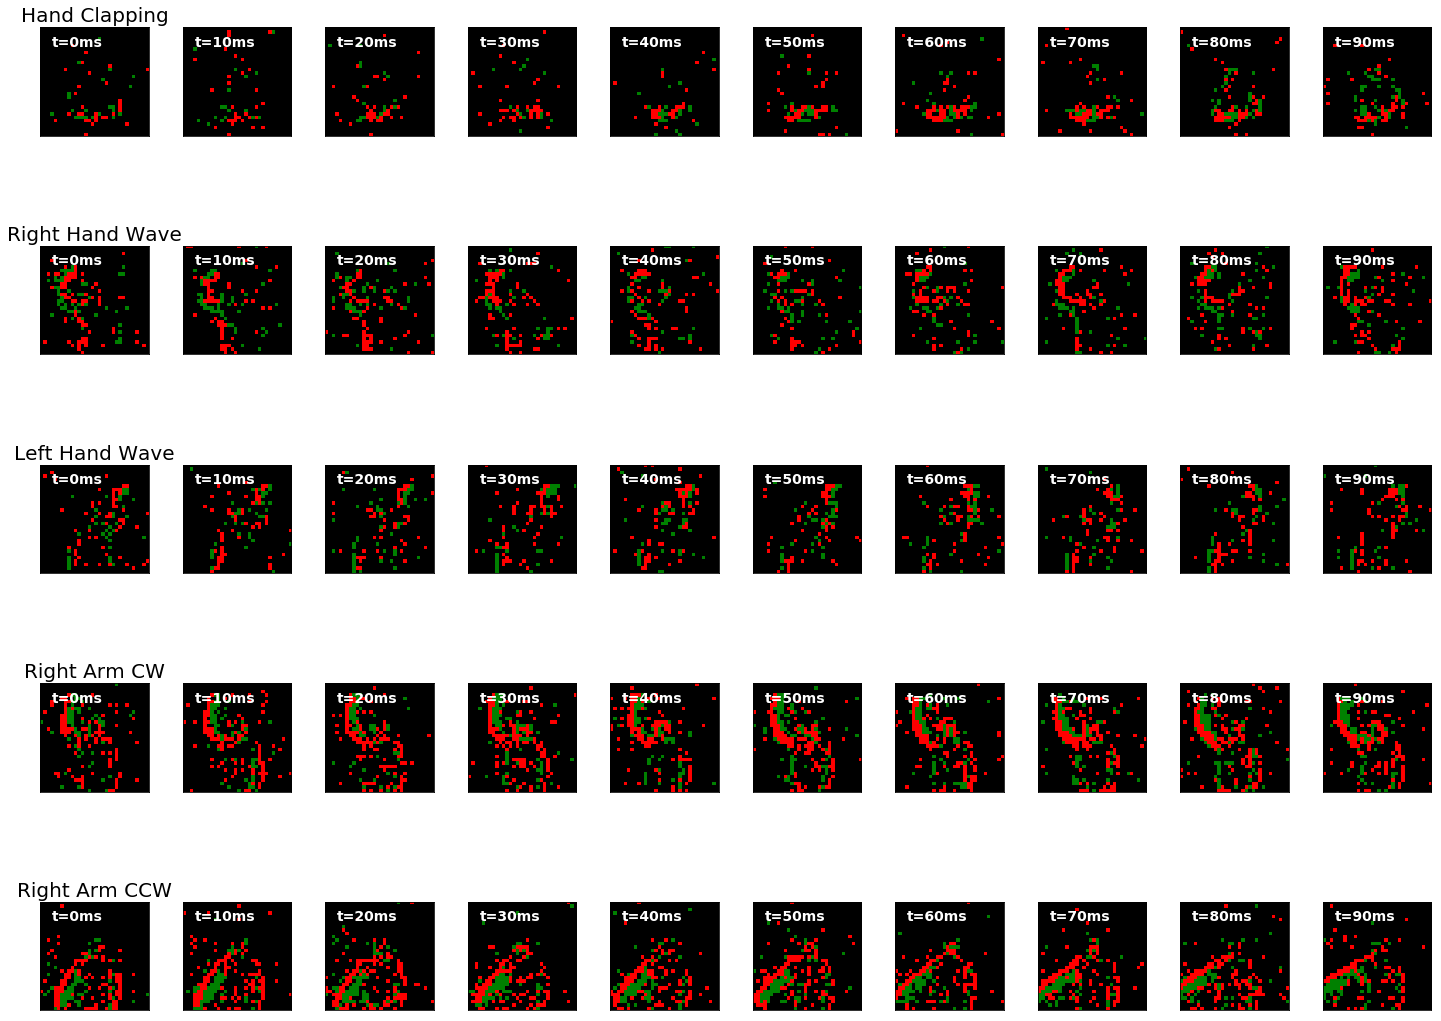

In [31]:
plot_gestures_imshow(input_test[:100].swapaxes(0,1),labels[:5],nim=5, transpose=True, avg=10)
tight_layout()
savefig(directory+'convergence_dvs_gestures_sample.png')

In [32]:
args.epochs

4500